0 b'DATA'
1 b'CBCHIGH_CAT1'
2 b'CBCHIGH_CAT2'
3 b'CBCHIGH_CAT3'
4 b'CBCHIGH_CAT4'
5 b'CBCLOW_CAT1'
6 b'CBCLOW_CAT2'
7 b'CBCLOW_CAT3'
8 b'CBCLOW_CAT4'
9 b'BURST_CAT1'
10 b'BURST_CAT2'
11 b'BURST_CAT3'
12 b'BURST_CAT2E'
13 b'BURST_CAT3E'
14 b'CW_CAT1'
15 b'STOCH_CAT1'
16 b'STOCH_CAT2_H1L1'
17 b'STOCH_CAT2_H2L1'


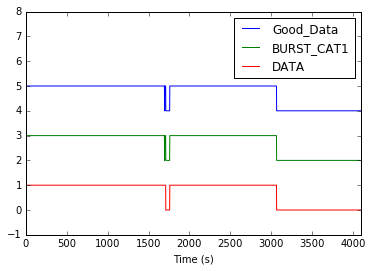

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import h5py

fileName = '/Users/babburi/Documents/Classroom/DataScience/LIGO_datasets/H-H1_LOSC_4_V1-815411200-4096.hdf5'
dataFile = h5py.File(fileName, 'r')
gpsStart = dataFile['meta']['GPSstart'].value

dqInfo = dataFile['quality']['simple']
bitnameList = dqInfo['DQShortnames'].value
nbits = len(bitnameList)

for bit in range(nbits):
    print (bit, bitnameList[bit])

qmask = dqInfo['DQmask'].value  #a vector of bitmasked integers representing data quality on all 18 channels
sci = (qmask >> 0) & 1   # a boolean vector representing the data quality in the first channel
burst1 = (qmask >> 9) & 1  # a boolean vector representing the data quality in the ninth channel
goodData_1hz = sci & burst1  # a boolean vector representing data quality for both first and ninth channels

plt.plot(goodData_1hz + 4, label='Good_Data')
plt.plot(burst1 + 2, label='BURST_CAT1')
plt.plot(sci, label='DATA')
plt.axis([0, 4096, -1, 8])
plt.legend(loc=1)
plt.xlabel('Time (s)')

# ignore periods of bad data by taking slices
dummy = np.zeros(goodData_1hz.shape)
masked_dummy = np.ma.masked_array(dummy, np.logical_not(goodData_1hz))
segments = np.ma.flatnotmasked_contiguous(masked_dummy)
segList = [(int(seg.start + gpsStart), int(seg.stop + gpsStart)) for seg in segments]

In [15]:
np.logical_not(goodData_1hz)

array([False, False, False, ...,  True,  True,  True], dtype=bool)

In [42]:
masked_dummy = np.ma.masked_array([0, 0, 0], [False, True, False])

In [48]:
np.ma.flatnotmasked_contiguous(masked_dummy)

[slice(0, 1, None), slice(2, 3, None)]

In [49]:
for s in sgm:
    print(s.stop)

1
3
